## 1. 라이브러리 가져오기
## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import os
from pathlib import Path

## 2. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [2]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [3]:
# 날짜 처리
data = pd.read_csv('../../201901-202003.csv')
# data = pd.read_csv('data/201901-202003.csv')
# data = pd.read_csv(os.path.join(Path(self).resolve().parent, '201901-202003.csv'))
data = data.fillna('')
data.tail(5)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6
24697791,202003,충북,충주시,휴양콘도 운영업,충북,충주시,60s,1,5,3,194000,3


In [4]:
data_new = pd.read_csv('../../202004.csv')
data_new = data_new.fillna('')
data_new.tail(5)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7
1350321,202004,충북,충주시,휴양콘도 운영업,충북,충주시,60s,2,5,3,227000,4


In [9]:
data = pd.concat([data, data_new], ignore_index=True)
data.tail(5)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
26048109,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
26048110,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
26048111,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
26048112,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7
26048113,202004,충북,충주시,휴양콘도 운영업,충북,충주시,60s,2,5,3,227000,4


In [10]:
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [12]:
# 데이터 정제 + 컬럼 추가

'''
# 추가해볼 만한 컬럼
# 거주 지역과 결제 지역이 같으면 1, 다르면 0
# CNT를 min max로 나눠서 10개 카테고리로 나눠서 해보기
# 업종에 나이가 영향을 줄 수 있지 않을까
# feature 상관분석, PCA 해보기
'''

df = data.copy()

'''##########################################################################'''
# 1. 계절 / 봄(1), 여름(2), 가을(3), 겨울(4)
# df.loc[(df['month']>=3)&(df['month']<=5) ,'season'] = 1
# df.loc[(df['month']>=6)&(df['month']<=8) ,'season'] = 2
# df.loc[(df['month']>=9)&(df['month']<=11) ,'season'] = 3
# df.loc[(df['month']>11),'season'] = 4
# df.loc[(df['month']<=2),'season'] = 4

# df

'''##########################################################################'''
# 2. 거주(1) or 여행(0)
df.loc[(df['CARD_SIDO_NM'] == df['HOM_SIDO_NM']), 'visitor'] = 1
df.loc[(df['CARD_SIDO_NM'] != df['HOM_SIDO_NM']), 'visitor'] = 0

# df

'''##########################################################################'''
# 3. 결제 건수 20개 범위로 나누기 
# df['CNT_Category'] = pd.cut(df['CNT'], 10, labels=False)

# df

# CNT 처리하기 위해 정리한 것
# cut은 범위를 동일하게 자른 것, qcut은 범위 내에 들어오는 갯수가 동일하게 자른 것
# print(max(df['CNT']))
# print(min(df['CNT']))
# df['CNT']
# pd.cut(df['CNT'], 20, labels=False)
# cnt_category = pd.qcut(df['CNT'], 20, labels=False)
# print(cnt_category)
# print(cnt_category[0])
# print(cnt_category[1])
# print(cnt_category[1057391])
# cnt_category = pd.cut(df['CNT'], 20, labels=False)
# print(max(cnt_category)) # 19
# print(min(cnt_category)) # 0
# print(len(df['CNT']))
# print(cnt_category)

'''##########################################################################'''
# 4. 코로나
covid = ['관광 민예품 및 선물용품 소매업','그외 기타 분류안된 오락관련 서비스업','그외 기타 스포츠시설 운영업','기타 대형 종합 소매업','기타 수상오락 서비스업','기타 외국식 음식점업','기타 주점업','내항 여객 운송업','마사지업','면세점','버스 운송업','비알콜 음료점업','서양식 음식점업','스포츠 및 레크레이션 용품 임대업','여관업','여행사업','욕탕업','일반유흥 주점업','일식 음식점업','자동차 임대업','전시 및 행사 대행업','정기 항공 운송업','중식 음식점업','차량용 가스 충전업','차량용 주유소 운영업','체인화 편의점','택시 운송업','피자 햄버거 샌드위치 및 유사 음식점업','한식 음식점업','호텔업','화장품 및 방향제 소매업','휴양콘도 운영업']
df['covid'] = False
for virus in covid:
    df.loc[(df['STD_CLSS_NM'] == virus),'covid'] = True

# df

'''##########################################################################'''

# 5. 단골 고객 여부
df['gap']= df['CNT'] - df['CSTMR_CNT']
df.loc[df['gap'] <0,'mark'] = '취소있음'
df.loc[df['gap'] ==0,'mark'] = '고객다양'
df.loc[df['gap'] >0,'mark'] = '단골있음'

# df

'''##########################################################################'''

# 6. 제주도 입도 현황
# df.loc[(df['year']==2019) & (df['month']==1), 'Jeju_in'] = jeju_in[1][0]
# df.loc[(df['year']==2019) & (df['month']==2), 'Jeju_in'] = jeju_in[1][1]
# df.loc[(df['year']==2019) & (df['month']==3), 'Jeju_in'] = jeju_in[1][2]
# df.loc[(df['year']==2019) & (df['month']==4), 'Jeju_in'] = jeju_in[1][3]
# df.loc[(df['year']==2019) & (df['month']==5), 'Jeju_in'] = jeju_in[1][4]
# df.loc[(df['year']==2019) & (df['month']==6), 'Jeju_in'] = jeju_in[1][5]
# df.loc[(df['year']==2019) & (df['month']==7), 'Jeju_in'] = jeju_in[1][6]
# df.loc[(df['year']==2019) & (df['month']==8), 'Jeju_in'] = jeju_in[1][7]
# df.loc[(df['year']==2019) & (df['month']==9), 'Jeju_in'] = jeju_in[1][8]
# df.loc[(df['year']==2019) & (df['month']==10), 'Jeju_in'] = jeju_in[1][9]
# df.loc[(df['year']==2019) & (df['month']==11), 'Jeju_in'] = jeju_in[1][10]
# df.loc[(df['year']==2019) & (df['month']==12), 'Jeju_in'] = jeju_in[1][11]
# df.loc[(df['year']==2020) & (df['month']==1), 'Jeju_in'] = jeju_in[1][12]
# df.loc[(df['year']==2020) & (df['month']==2), 'Jeju_in'] = jeju_in[1][13]
# df.loc[(df['year']==2020) & (df['month']==3), 'Jeju_in'] = jeju_in[1][14]

df

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,visitor,covid,gap,mark
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1,1.0,False,0,고객다양
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1,1.0,False,1,단골있음
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1,1.0,False,0,고객다양
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1,1.0,False,1,단골있음
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1,1.0,False,0,고객다양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26048109,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5,2020,4,1.0,True,0,고객다양
26048110,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6,2020,4,1.0,True,0,고객다양
26048111,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5,2020,4,1.0,True,0,고객다양
26048112,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7,2020,4,1.0,True,2,단골있음


In [13]:
# 0. 컬럼 드랍
# df = data.copy()

# df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'CNT_Category', 'covid'], axis=1)
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'gap'], axis=1)

# 0. 독립 변수 선정
# columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month', 'season', 'visitor', 'CNT_Category', 'covid']
# 위에 총 12개 독립변수로 모델을 학습시켜본 뒤, 가장 영향 없는 4가지 삭제
# temp 생성하는 부분에 부하를 줄이기 위해 4개(covid, SEX_CTGO_CD, visitor, FLC) 없이 진행
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'mark', 'covid', 'visitor', 'year', 'month']

df = df.groupby(columns).sum().reset_index(drop=False)

In [14]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [23]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,mark,covid,visitor,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,고객다양,False,1.0,2019,1,305,35414315,305
1,강원,건강보조식품 소매업,강원,고객다양,False,1.0,2019,2,331,43591514,331
2,강원,건강보조식품 소매업,강원,고객다양,False,1.0,2019,3,237,31065350,237
3,강원,건강보조식품 소매업,강원,고객다양,False,1.0,2019,4,209,22880650,209
4,강원,건강보조식품 소매업,강원,고객다양,False,1.0,2019,5,293,33120554,293
...,...,...,...,...,...,...,...,...,...,...,...
217067,충북,휴양콘도 운영업,충북,단골있음,True,1.0,2020,2,182,8563400,267
217068,충북,휴양콘도 운영업,충북,단골있음,True,1.0,2020,3,27,2591260,44
217069,충북,휴양콘도 운영업,충북,단골있음,True,1.0,2020,4,28,1030400,43
217070,충북,휴양콘도 운영업,충북,취소있음,True,1.0,2019,8,12,926400,10


## 3. 탐색적 자료분석
## Exploratory Data Analysis

In [25]:
# # 시도 컬럼 수

# print(len(data.CARD_SIDO_NM))

# sido = pd.Series.unique(data.CARD_SIDO_NM)
# print(len(sido))
# print(sido)

# # 시군구 컬럼 수

# print(len(data.CARD_CCG_NM))

# ccg = pd.Series.unique(data.CARD_CCG_NM)
# print(len(ccg))
# print(ccg)

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [15]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
train_features = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [16]:
k = int(len(train_features)*0.9)

x_train = train_features[:k]
y_train = train_target[:k]
x_val = train_features[k:]
y_val = train_target[k:]

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

In [17]:
import lightgbm as lgbm

In [18]:
train_ds = lgbm.Dataset(x_train, label=y_train)
val_ds = lgbm.Dataset(x_val, label=y_val)

In [19]:
# 파라미터 종류 참고 : https://lightgbm.readthedocs.io/en/latest/Parameters.html
# 파라미터 튜닝 참고 : https://greatjoy.tistory.com/72

params = {
            'learning_rate' : 0.01, # 일반적으로 0.01 ~ 0.1, 성능 높일 때 값 줄여서 진행
            #'num_iterations' : 1000, # 디폴트는 100 / 너무 크게하면 과적합 발생 위험
            # 'max_depth' : -1, # 디폴트는 -1 / 0 이하는 제한 없다는 뜻, featureure가 많으면 depth를 크게 가져가야 함
            'boosting': 'gbdt', # 디포트는 gbdt / rf(RandomForest), dart(정확도 중요할 때 사용), goss(샘플링 이용)  / boosting, boosting_type, boost 다 같은 말
            'objective': 'tweedie', # 디폴트는 regression / regression 종류 : regression_l1, huber, fair, poisson, quantile, mape, gamma, tweedie
#             'objective': 'multiclass', # 멀티 클래스로 지정
#             'num_class': 41, # 클래스 수는 업종 수인 41개로 지정
            'tweedie_variance_power': 1.1,
#             'metric': 'softmax',
            'metric': 'custom',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1 # 정규화로 과적합 방지 / 정확도 저하될 수 있기 떄문에 일반적으로는 default 0 그대로 유지
        }

In [20]:
def rmsle_1(y_pred, data):
    y_true = np.array(data.get_label())
    score= np.sqrt(np.square(np.log1p(y_pred + 1) - np.log1p(y_true + 1)).mean())
    return 'rmsle', score, False

In [21]:
# 훈련
model = lgbm.train(params,
                   train_ds,
                   20000,
                   val_ds,
                   verbose_eval = 1000,
                   early_stopping_rounds = 1000,
                   feval = rmsle_1
                 )

Training until validation scores don't improve for 1000 rounds
[1000]	valid_0's rmsle: 0.0855933
[2000]	valid_0's rmsle: 0.0760765
[3000]	valid_0's rmsle: 0.0706916
[4000]	valid_0's rmsle: 0.0668092
[5000]	valid_0's rmsle: 0.064445
[6000]	valid_0's rmsle: 0.0622325
[7000]	valid_0's rmsle: 0.0606556
[8000]	valid_0's rmsle: 0.0591015
[9000]	valid_0's rmsle: 0.057907
[10000]	valid_0's rmsle: 0.0566326
[11000]	valid_0's rmsle: 0.0555777
[12000]	valid_0's rmsle: 0.0548891
[13000]	valid_0's rmsle: 0.0542371
[14000]	valid_0's rmsle: 0.053675
[15000]	valid_0's rmsle: 0.0530829
[16000]	valid_0's rmsle: 0.0525866
[17000]	valid_0's rmsle: 0.0520672
[18000]	valid_0's rmsle: 0.0515994
[19000]	valid_0's rmsle: 0.0512102
[20000]	valid_0's rmsle: 0.0508192
Did not meet early stopping. Best iteration is:
[20000]	valid_0's rmsle: 0.0508192


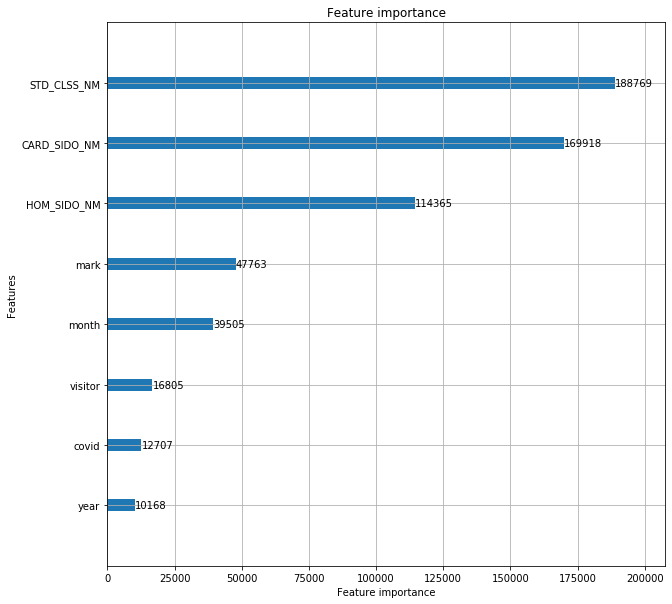

In [22]:
# Feature 비중 확인 feat. KMH

# feature_names =  ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month', 'season', 'visitor', 'CNT_Category', 'covid']
# 먼저 12개의 독립변수의 비중을 확인해본 후, 낮은 변수들은 삭제

# index = np.arange(len(feature_names))

import matplotlib.pyplot as plt
from lightgbm import plot_importance
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, max_num_features=12, ax=ax)

In [ ]:
''' 
# 참고 : https://injo.tistory.com/48
# 참고 : https://www.kaggle.com/ashishpatel26/feature-importance-of-lightgbm
# 참고 : https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html

feature_names = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
index = np.arange(len(feature_names))

import matplotlib.pyplot as plt

plt.barh(index, model.feature_importances_, align='center')
plt.yticks(index, feature_names)
plt.ylim(-1, len(feature_names))
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()
'''

In [34]:
# # Model Save
# from sklearn.externals import joblib
# joblib.dump(model, 'lgbm_gbdt_tweedie_1000epochs.pkl')

# # Model Load
# load_model = joblib.load('lgbm_dart_multiclass(41)_1000epochs.pkl')

## 6. 결과 및 결언
## Conclusion & Discussion

In [24]:
# 예측 템플릿 만들기

CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
# AGEs          = df_num['AGE'].unique()
#SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
#FLCs          = df_num['FLC'].unique()

# seasons       = df_num['season'].unique()
visitors      = df_num['visitor'].unique()
#CNT_Categories= df_num['CNT_Category'].unique()
covids        = df_num['covid'].unique()

marks         = df_num['mark'].unique()
# Jeju_ins      = df_num['Jeju_in'].unique()

years         = [2020]
months        = [4, 7]

temp = []

for STD_CLSS_NM in STD_CLSS_NMs:
    for CARD_SIDO_NM in CARD_SIDO_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for mark in marks:
#                 for Jeju_in in Jeju_ins:
            #for AGE in AGEs:
                    #for SEX_CTGO_CD in SEX_CTGO_CDs:
                        #for FLC in FLCs:
                        #for season in seasons:
                for visitor in visitors:
                                #for CNT_Category in CNT_Categories:
                    for covid in covids:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, #AGE, SEX_CTGO_CD, FLC,
                                             mark, covid, visitor, # Jeju_in, SEX_CTGO_CD, FLC,
                                             #season, visitor, CNT_Category, covid,
                                             year, month
                                            ])

# =====> 아래처럼 수정 

# from itertools import product

# items = [list(CARD_SIDO_NMs), list(STD_CLSS_NMs), list(HOM_SIDO_NMs), list(AGEs), list(SEX_CTGO_CDs), list(FLCs),
#          list(seasons), list(visitors), # list(CNT_Categories), list(covids),
#          years, months]

# temp = list(product(*items))

# ----------------------------

temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [25]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)

In [26]:
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp['CARD_SIDO_NM'] = temp['CARD_SIDO_NM'].astype(int)
temp['STD_CLSS_NM'] = temp['STD_CLSS_NM'].astype(int)
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [43]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])


ValueError: y contains previously unseen labels: ['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']

In [44]:
temp

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004.0,강원,건강보조식품 소매업,4.097016e+09
1,202004.0,강원,골프장 운영업,5.931644e+10
2,202004.0,강원,과실 및 채소 소매업,3.776160e+10
3,202004.0,강원,관광 민예품 및 선물용품 소매업,1.027668e+10
4,202004.0,강원,그외 기타 분류안된 오락관련 서비스업,1.050288e+08
...,...,...,...,...
1389,202007.0,충북,피자 햄버거 샌드위치 및 유사 음식점업,8.405013e+10
1390,202007.0,충북,한식 음식점업,1.009750e+12
1391,202007.0,충북,호텔업,9.522491e+08
1392,202007.0,충북,화장품 및 방향제 소매업,4.060799e+10


In [40]:
# 제출 파일 만들기
sub_04 = pd.read_csv('data/submission.csv', index_col=0)

data_2004 = data_new.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM']).AMT.sum().reset_index(drop=False)
sub_04 = sub_04.loc[sub_04['REG_YYMM']==202004]
sub_04 = sub_04[['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM']]
sub_04 = sub_04.merge(data_2004, left_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
sub_04 = sub_04.fillna(0)
sub_04

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004,강원,건강보조식품 소매업,8.882399e+07
1,202004,강원,골프장 운영업,4.708347e+09
2,202004,강원,과실 및 채소 소매업,1.121029e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.436078e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...,...
692,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.373636e+09
693,202004,충북,한식 음식점업,1.891104e+10
694,202004,충북,호텔업,1.412150e+07
695,202004,충북,화장품 및 방향제 소매업,4.505074e+08


In [41]:
sub_07 = pd.read_csv('data/submission.csv', index_col=0)

sub_07 = sub_07.loc[sub_07['REG_YYMM']==202007]
sub_07 = sub_07[['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM']]
sub_07 = sub_07.merge(data_2004, left_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
sub_07 = sub_07.fillna(0)
sub_07

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202007,강원,건강보조식품 소매업,0.0
1,202007,강원,골프장 운영업,0.0
2,202007,강원,과실 및 채소 소매업,0.0
3,202007,강원,관광 민예품 및 선물용품 소매업,0.0
4,202007,강원,그외 기타 분류안된 오락관련 서비스업,0.0
...,...,...,...,...
692,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,0.0
693,202007,충북,한식 음식점업,0.0
694,202007,충북,호텔업,0.0
695,202007,충북,화장품 및 방향제 소매업,0.0


In [52]:
submission = pd.concat([sub_04, sub_07], ignore_index=True)
submission.index.name = 'id'
submission.to_csv('HDLY_0731.csv', encoding='utf-8-sig')
submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,8.882399e+07
1,202004,강원,골프장 운영업,4.708347e+09
2,202004,강원,과실 및 채소 소매업,1.121029e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.436078e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,0.000000e+00
1390,202007,충북,한식 음식점업,0.000000e+00
1391,202007,충북,호텔업,0.000000e+00
